In [ ]:
#fastai
!pip install -q fastbook==0.0.29

#ctgan
!pip install -q sdv==0.18.0

#review generation
!pip install -q transformers==4.27.3

#DuckDuckGo Search
!pip install -q duckduckgo_search==5.3.0b4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

## ลบ Folder

In [ ]:
import shutil
import os

# Define the folder path
folder_path = "/content/images/"

# Check if the folder exists
if os.path.exists(folder_path):
    # Delete the folder and its contents
    shutil.rmtree(folder_path)

In [ ]:
import shutil

# Replace 'your_folder_path' with the path of the folder you want to delete
folder_path = "/content/resized_anime_images"

# Delete the entire folder
shutil.rmtree(folder_path)

##  ดึงรูป

In [ ]:
from fastbook import *
from fastai.vision.widgets import *
from tqdm.auto import tqdm
from duckduckgo_search import DDGS

#download from duckduckgo
def search_images_ddg(key, max_n=200):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass

def search_images_ddg_v2(key,max_n=200):
    """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        Note: Instead of using our own implementation, we using library instead!
    """
    responses = DDGS().images(
                          keywords=key,
                          region="wt-wt",
                          safesearch="off",
                          size=None,
                          color=None,
                          type_image=None,
                          layout=None,
                          license_image=None,
                          max_results=max_n,
                      )
    urls = [ r['image'] for r in responses ]
    return urls

In [ ]:
#เอารูปอะไรบ้าง (labels)

labels = [
    'Shingeki no Kyojin anime scenes in episode',
    'Kimetsu no Yaiba anime scenes in episode',
    'Death Note anime scenes in episode',
    'Boku no Hero Academia anime scenes in episode',
    'Jujutsu Kaisen anime scenes in episode',
    'Hunter × Hunter (2011) anime scenes in episode',
    'One Punch Man anime scenes in episode',
    'Tokyo Ghoul anime scenes in episode',
    'Sword Art Online anime scenes in episode',
    'Hagane no Renkinjutsushi: Fullmetal Alchemist anime scenes in episode',
    'Naruto anime scenes in episode',
    'Kimi no Na wa. anime scenes in episode',
    'One Piece anime scenes in episode',
    'Koe no Katachi anime scenes in episode',
    'Yakusoku no Neverland anime scenes in episode',
    'Ansatsu Kyoushitsu anime scenes in episode',
    'Shigatsu wa Kimi no Uso anime scenes in episode',
    'Boku dake ga Inai Machi anime scenes in episode',
    'Mob Psycho 100 anime scenes in episode',
    'Haikyuu!! anime scenes in episode',
    'Steins;Gate anime scenes in episode',
    'Re:Zero kara Hajimeru Isekai Seikatsu anime scenes in episode',
    'Noragami anime scenes in episode',
    'No Game No Life anime scenes in episode',
    'Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai anime scenes in episode',
    'Toradora! anime scenes in episode',
    'Kaguya-sama wa Kokurasetai: Tensaitachi no Renai Zunousen anime scenes in episode',
    'Black Clover anime scenes in episode',
    'Nanatsu no Taizai anime scenes in episode',
    'Akame ga Kill! anime scenes in episode',
    'Violet Evergarden anime scenes in episode',
    'Dr. Stone anime scenes in episode',
    'Kono Subarashii Sekai ni Shukufuku wo! anime scenes in episode',
    'Kiseijuu: Sei no Kakuritsu anime scenes in episode',
    'Darling in the Franxx anime scenes in episode',
    'Chainsaw Man anime scenes in episode',
    'Spy × Family anime scenes in episode',
    'Ao no Exorcist anime scenes in episode',
    'Death Parade anime scenes in episode',
    'Horimiya anime scenes in episode',
    'Vinland Saga anime scenes in episode',
    'Code Geass: Hangyaku no Lelouch anime scenes in episode',
    'Kakegurui anime scenes in episode',
    'JoJo no Kimyou na Bouken (TV) anime scenes in episode',
    'Sen to Chihiro no Kamikakushi anime scenes in episode',
    'Shin Seiki Evangelion anime scenes in episode',
    'Angel Beats! anime scenes in episode',
    'Cowboy Bebop anime scenes in episode',
    'Bleach anime scenes in episode',
    'Mirai Nikki anime scenes in episode',
    'Enen no Shouboutai anime scenes in episode',
    'Tokyo Revengers anime scenes in episode',
    'Tate no Yuusha no Nariagari anime scenes in episode',
    'Kill la Kill anime scenes in episode',
    'Charlotte anime scenes in episode',
    'Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai. anime scenes in episode',
    'Bungou Stray Dogs anime scenes in episode',
    'Shokugeki no Souma anime scenes in episode',
    'Tensei Shitara Slime Datta Ken anime scenes in episode',
    'Hataraku Maou-sama! anime scenes in episode',
    'Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e anime scenes in episode',
    'Another anime scenes in episode',
    'Made in Abyss anime scenes in episode',
    'Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka anime scenes in episode',
    'Mushoku Tensei: Isekai Ittara Honki Dasu anime scenes in episode',
    'Overlord anime scenes in episode',
    'Fairy Tail anime scenes in episode',
    'Yahari Ore no Seishun Love Come wa Machigatteiru. anime scenes in episode',
    'Soul Eater anime scenes in episode',
    'Psycho-Pass anime scenes in episode',
    'Dororo anime scenes in episode',
    'Tengen Toppa Gurren Lagann anime scenes in episode',
    'Fate Zero anime scenes in episode',
    'Hyouka anime scenes in episode',
    'Chuunibyou demo Koi ga Shitai! anime scenes in episode',
    'Bakemonogatari anime scenes in episode',
    'Devilman Crybaby anime scenes in episode',
    'Kobayashi-san Chi no Maidragon anime scenes in episode',
    'Saiki Kusuo no Ψ-nan anime scenes in episode',
    'Tenki no Ko anime scenes in episode',
    'Howl no Ugoku Shiro anime scenes in episode',
    'Kimi no Suizou wo Tabetai anime scenes in episode',
    'Sono Bisque Doll wa Koi wo Suru anime scenes in episode',
    'Sousou no Frieren anime scenes in episode',
    'Wotaku ni Koi wa Muzukashii anime scenes in episode',
    'Owari no Seraph anime scenes in episode',
    'BANANA FISH anime scenes in episode',
    'Mahou Shoujo Madoka☆Magica anime scenes in episode',
    'Kami no Tou: Tower of God anime scenes in episode',
    'Kanojo, Okarishimasu anime scenes in episode',
    'THE GOD OF HIGH SCHOOL anime scenes in episode',
    'High School DxD anime scenes in episode',
    'Fruits Basket: 1st Season anime scenes in episode',
    'Durarara!! anime scenes in episode',
    'Fumetsu no Anata e anime scenes in episode',
    'CLANNAD anime scenes in episode',
    'Goblin Slayer anime scenes in episode',
    'Komi-san wa, Komyushou desu. anime scenes in episode',
    'Go-toubun no Hanayome anime scenes in episode',
    'Monster anime scenes in episode',
]


In [ ]:
#save ไว้ที่ไหน
path = Path('images')

#เอา label ละกี่รูป
MAX_N = 200

if not path.exists():
    path.mkdir()
for l in tqdm(labels):
    dest = (path/l)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg_v2(l, max_n=MAX_N)
    download_images(dest, urls=results)

  0%|          | 0/100 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


แปลงรูป

In [ ]:
from PIL import Image
import os
import warnings


warnings.filterwarnings("ignore", message="Palette images with Transparency expressed in bytes should be converted to RGBA images")

input_folder = '/content/images'
output_folder = '/content/resized_anime_images'

new_size = (600, 600)  # Adjust

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def resize_images_in_folder(input_folder, output_folder, new_size):
    # Iterate over all files and subfolders in the input folder
    for root, dirs, files in os.walk(input_folder):
        # Create a corresponding output folder structure
        relative_path = os.path.relpath(root, input_folder)
        current_output_folder = os.path.join(output_folder, relative_path)

        if not os.path.exists(current_output_folder):
            os.makedirs(current_output_folder)

        for file in files:
            if file.lower().endswith(('jpg', 'jpeg', 'png', 'gif', 'bmp', 'tiff')):
                input_path = os.path.join(root, file)
                output_path = os.path.join(current_output_folder, file)

                with Image.open(input_path) as img:
                    if img.mode in ["LA", "PA"]:
                        continue
                    if img.mode == "P":
                        img = img.convert("RGBA")  # Convert palette-based images to RGBA
                    if img.mode == "RGBA":
                        img = img.convert("RGB")  # Convert RGBA to RGB to save as JPEG

                    # Resize and save the image
                    resized_img = img.resize(new_size, Image.LANCZOS)
                    resized_img.save(output_path)

#  Function to resize images
resize_images_in_folder(input_folder, output_folder, new_size)


All images resized successfully, excluding incompatible modes.


### เปิดดูรูป

In [ ]:
folder_path = Path('/content/images/')

In [ ]:
#เช็คว่าได้รูปอะไรบ้าง
fns = get_image_files(folder_path)
fns[56]

Path('/content/images/Hagane no Renkinjutsushi: Fullmetal Alchemist anime scenes in episode/55501316-7f08-40b2-9b88-e80204dd74a5.jpg')

In [ ]:
fns

(#28919) [Path('/content/images/Hagane no Renkinjutsushi: Fullmetal Alchemist anime scenes in episode/8b3d7076-8bc9-4640-81ae-73f8100dce6f.jpg'),Path('/content/images/Hagane no Renkinjutsushi: Fullmetal Alchemist anime scenes in episode/cf4b02e4-7ff9-446a-a78e-881557d129f5.jpg'),Path('/content/images/Hagane no Renkinjutsushi: Fullmetal Alchemist anime scenes in episode/424dec75-180c-42ca-8dfd-6e58ddf72e95.png'),Path('/content/images/Hagane no Renkinjutsushi: Fullmetal Alchemist anime scenes in episode/6046f2b8-fc9b-4432-be9e-c6676ceb7a37.jpg'),Path('/content/images/Hagane no Renkinjutsushi: Fullmetal Alchemist anime scenes in episode/323dee4d-7327-4139-ae2e-9d1382cf233b.jpg'),Path('/content/images/Hagane no Renkinjutsushi: Fullmetal Alchemist anime scenes in episode/73d182cb-fbd5-406c-b569-9dcb1f8b4c87.png'),Path('/content/images/Hagane no Renkinjutsushi: Fullmetal Alchemist anime scenes in episode/71826b93-140e-4ddc-9f31-b1a90855222a.jpg'),Path('/content/images/Hagane no Renkinjutsush

In [ ]:
#ดูว่าหารูปไหนไม่เจอบ้าง
failed = verify_images(fns)

In [ ]:
#นำรูปที่หาไม่เจอออก
failed.map(Path.unlink)

(#1073) [None,None,None,None,None,None,None,None,None,None...]

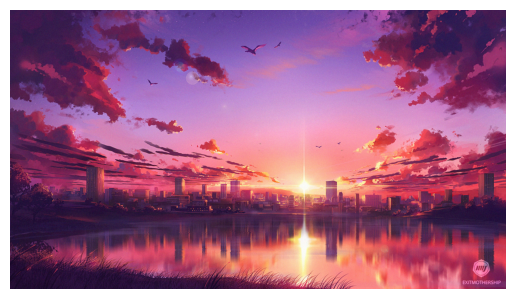

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image

image_path = fns[100]

image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!zip -r folder.zip /content/resized_anime_images

In [ ]:
from google.colab import files
files.download('folder.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>